### 215537E


### Question 1

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

#### a) b)

In [2]:

# 1. Load the runway image
img = cv.imread('runway.png', cv.IMREAD_GRAYSCALE)

gamma_05 = 0.5
table_a = np.array([((i / 255.0) ** gamma_05) * 255 for i in np.arange(0, 256)]).astype("uint8")
img_a = cv.LUT(img, table_a)

gamma_20 = 2.0
table_b = np.array([((i / 255.0) ** gamma_20) * 255 for i in np.arange(0, 256)]).astype("uint8")
img_b = cv.LUT(img, table_b)

#### Visualization

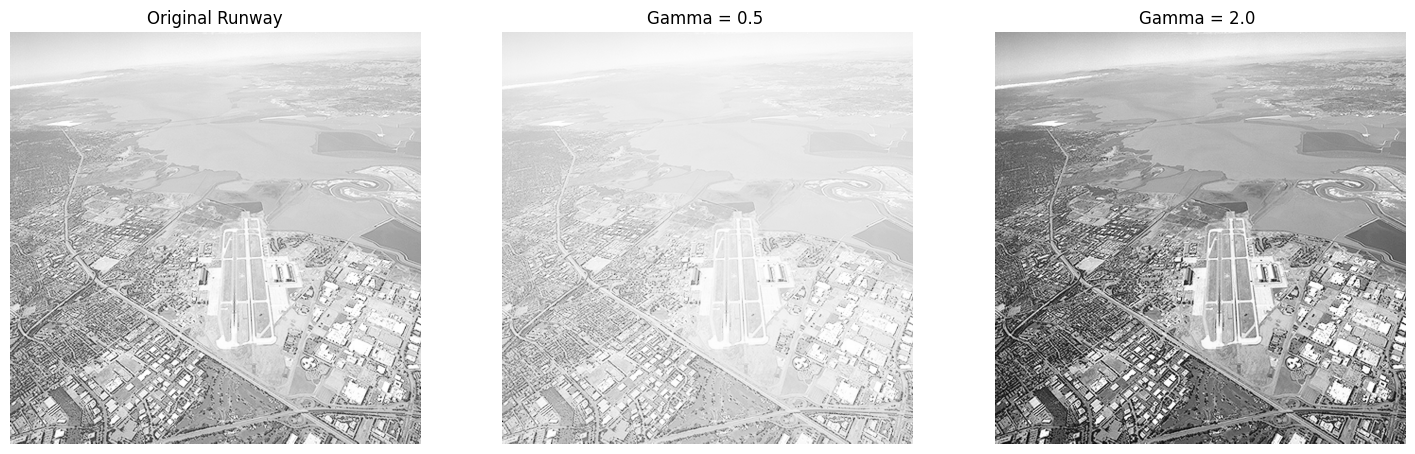

In [3]:
# Visualization
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Runway')
    
ax[1].imshow(img_a, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Gamma = 0.5 ')
    
ax[2].imshow(img_b, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gamma = 2.0 ')

for a in ax:
    a.axis('off')
plt.show()


**Gamma = 0.5 (Brightening):** When , the transformation curve "bows upward". This maps a narrow range of dark input pixels to a wider range of output pixels, effectively **enhancing detail in the shadows** and brightening the overall image.



**Gamma = 2.0 (Darkening):** When , the curve "bows downward". This compresses dark intensities and stretches highlights, resulting in a **darker image** with higher contrast in the bright regions.


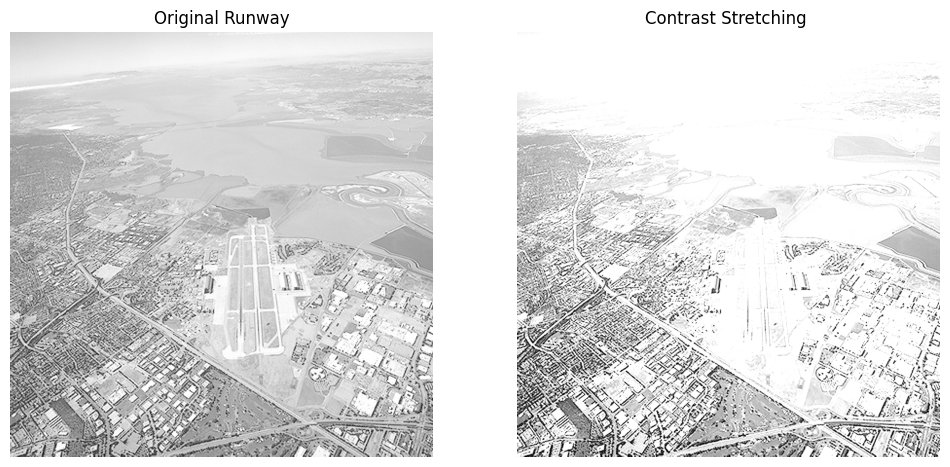

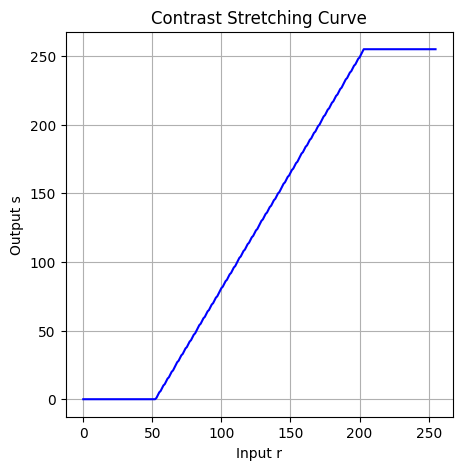

In [4]:

t1 = np.linspace(0, 0, 52).astype('uint8')
t2 = np.linspace(0, 255, 204 - 52).astype('uint8')
t3 = np.linspace(255, 255, 256 - 204).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

img_c = cv.LUT(img, transform)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Runway')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_c, cmap='gray', vmin=0, vmax=255)
plt.title('Contrast Stretching ')
plt.axis('off')

plt.show()

r_vals = np.arange(256)
plt.figure(figsize=(5, 5))
plt.plot(r_vals, transform, 'b')
plt.title('Contrast Stretching Curve')
plt.xlabel('Input r')
plt.ylabel('Output s')
plt.grid(True)
plt.show()

The intensities in the middle range are linearly stretched to span the entire 8-bit range. This significantly increases the contrast of the runway features, making them stand out sharply against the background, though it "clips" details in the extreme shadows and highlights.


### Question 2

C:\Users\buwan\AppData\Local\Temp\ipykernel_8064\2283101431.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[1, 0].hist(l_channel.ravel(), 256, [0, 256], color='black')
C:\Users\buwan\AppData\Local\Temp\ipykernel_8064\2283101431.py:29: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax[1, 1].hist(l_corrected.ravel(), 256, [0, 256], color='black')


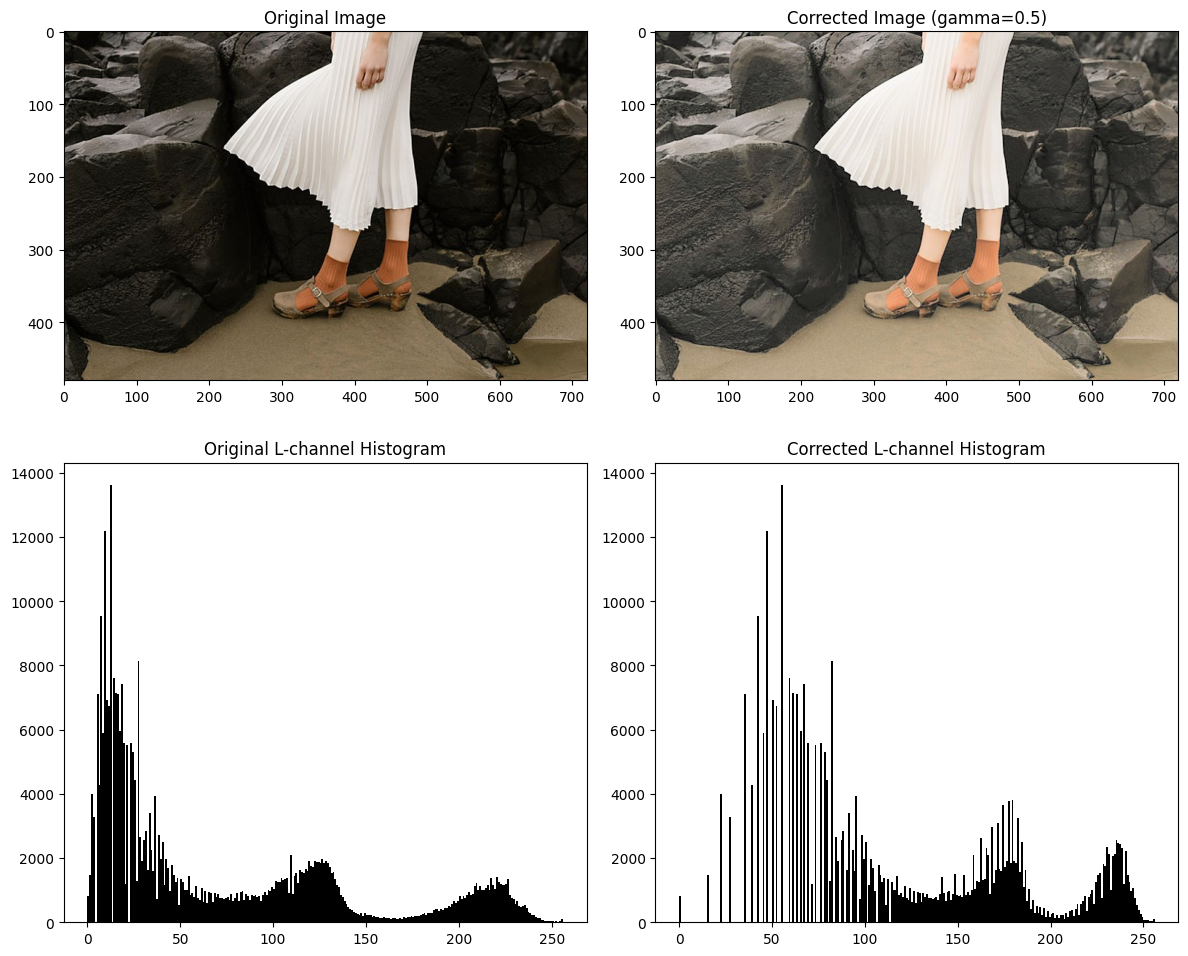

In [ ]:

img = cv.imread('highlights_and_shadows.jpg') 


lab_img = cv.cvtColor(img, cv.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv.split(lab_img)

gamma = 0.5 
table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype("uint8")
l_corrected = cv.LUT(l_channel, table)


lab_corrected = cv.merge([l_corrected, a_channel, b_channel])
img_corrected = cv.cvtColor(lab_corrected, cv.COLOR_Lab2BGR)


fig, ax = plt.subplots(2, 2, figsize=(12, 10))


ax[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
ax[0, 1].set_title(f'Corrected Image (gamma={gamma})')


ax[1, 0].hist(l_channel.ravel(), 256, [0, 256], color='black')
ax[1, 0].set_title('Original L-channel Histogram')
ax[1, 1].hist(l_corrected.ravel(), 256, [0, 256], color='black')
ax[1, 1].set_title('Corrected L-channel Histogram')

for row in ax:
    for a in row:
        a.axis('on') 
plt.tight_layout()
plt.show()

To brighten the image while preserving its natural colors, gamma correction () is applied specifically to the **L (Lightness) plane** in the **color space**. This approach increases visibility in dark regions by adjusting intensity while keeping the **a** and **b** chrominance channels untouched, preventing any artificial color distortion.

The L-channel histograms confirm this improvement, showing a clear shift from a dark-heavy distribution to a more balanced range. The originally compressed dark pixels are stretched toward the middle and higher intensities, successfully revealing hidden details in the shadows while maintaining a realistic final appearance.

### Question 3


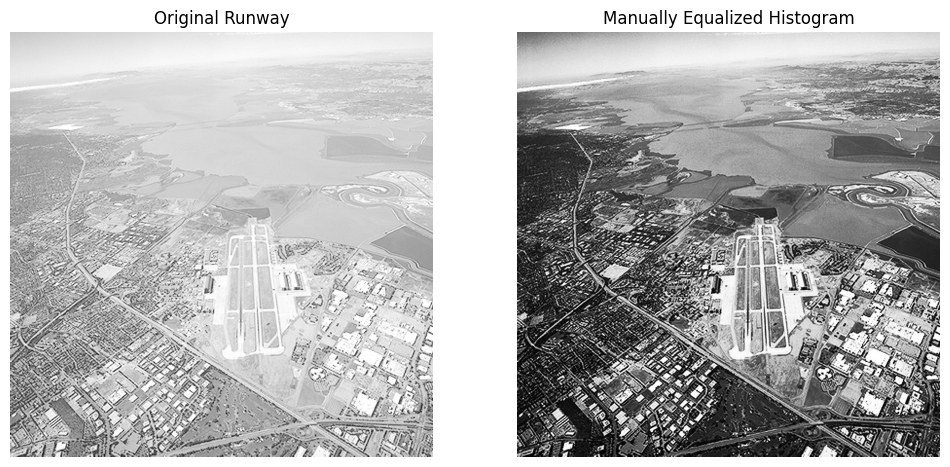

In [20]:

def manual_hist_equalization(f):
    M, N = f.shape
    L = 256
    hist, _ = np.histogram(f.flatten(), bins=L, range=[0, L])
    cdf = hist.cumsum()
    t = np.array([(L - 1) / (M * N) * cdf[k] for k in range(L)], dtype=np.uint8)
    g = t[f]
    return g

f = cv.imread('runway.png', cv.IMREAD_GRAYSCALE)

g_manual = manual_hist_equalization(f)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Runway')
ax[0].axis('off')

ax[1].imshow(g_manual, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Manually Equalized Histogram')
ax[1].axis('off')

plt.show()


Histogram equalization was implemented to automatically enhance the contrast of the runway image by spreading its most frequent intensity values across the full range.

* **Process**: Unlike manual contrast stretching which requires choosing specific points (), this method uses the **Cumulative Distribution Function (CDF)** of the image to create a global transformation. The goal is to produce an output image with a near-uniform histogram distribution.
* **Result**: The equalized image shows significantly improved global contrast. Features that were previously "washed out" or low-contrast (like the textures in the terrain and the distinct edges of the runway) are now much sharper and easier to distinguish.

### Question 4


In [3]:
img = cv.imread('looking_out.jpg')
#Otsu’s, work on single-channel images
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [ ]:
tresh, mask = cv.threshold(gray, 0, 255, 
                           cv.THRESH_BINARY + cv.THRESH_OTSU)

print(f"Otsu threshold: {tresh}")

Otsu threshold: 99.0


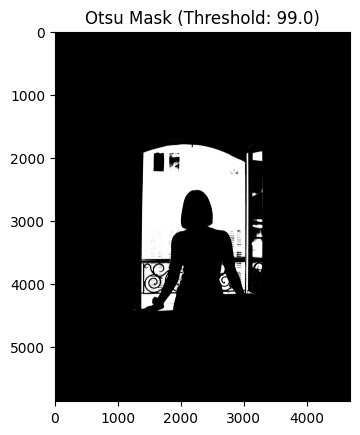

In [ ]:
plt.imshow(mask, cmap='gray')
plt.title(f'Otsu Mask (Threshold: {tresh})')
plt.show()

In [ ]:
def manual_hist_equalization(f):
    M, N = f.shape
    L = 256
    hist, _ = np.histogram(f.flatten(), bins=L, range=[0, L])
    cdf = hist.cumsum()
    t = np.array([(L - 1) / (M * N) * cdf[k] for k in range(L)], dtype=np.uint8)
    g = t[f]
    return g

equalized_full = cv.equalizeHist(gray)
final_equalized_foregorund = np.where(mask == 0, equalized_full, gray)    

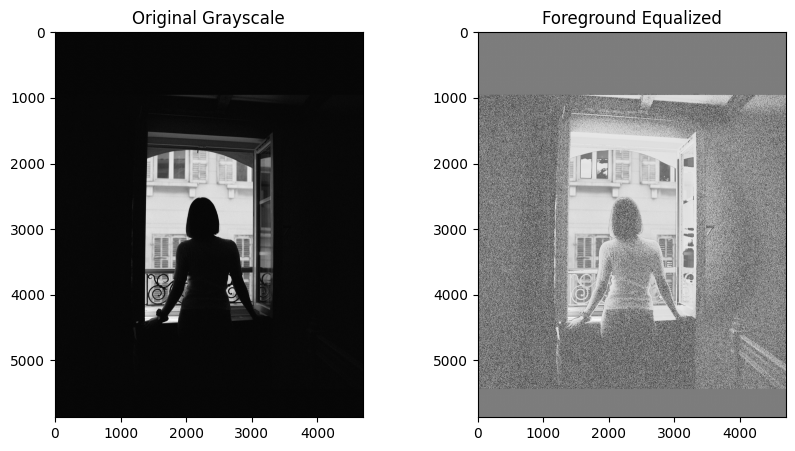

In [ ]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(gray, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(1, 2, 2), plt.imshow(final_equalized_foregorund, cmap='gray'), plt.title('Foreground Equalized')
plt.show()


The automatically calculated Otsu threshold value is 99.0. This value successfully segments the image into two distinct intensity classes. (some of the parts of backgorund captured too)

By performing histogram equalization specifically on the foreground mask, we are able to see details that were previously crushed into the black shadows like roofs wood and woman's clothes wrinkles and the stair handles

### Question 5


In [ ]:
#a)
def get_gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

kernel_5x5 = get_gaussian_kernel(5, 2)
print("5x5 Kernel:\n", kernel_5x5)

5x5 Kernel:
 [[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


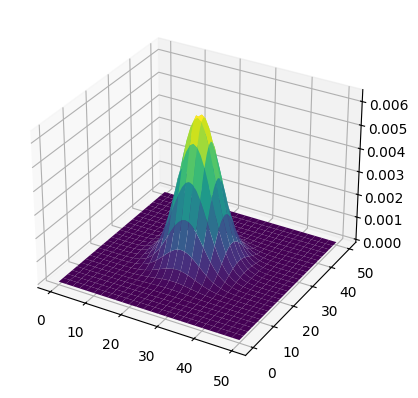

In [ ]:
#b)
# sigam = 5
kernel_51 = get_gaussian_kernel(51, 5)
x, y = np.meshgrid(np.arange(51), np.arange(51))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, kernel_51, cmap='viridis')
plt.show()

In [12]:
img = cv.imread('runway.png')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [ ]:
#c)
manual_blur = cv.filter2D(gray, -1, kernel_5x5)

In [ ]:
#d)
cv_blur = cv.GaussianBlur(gray, (5, 5), 5)

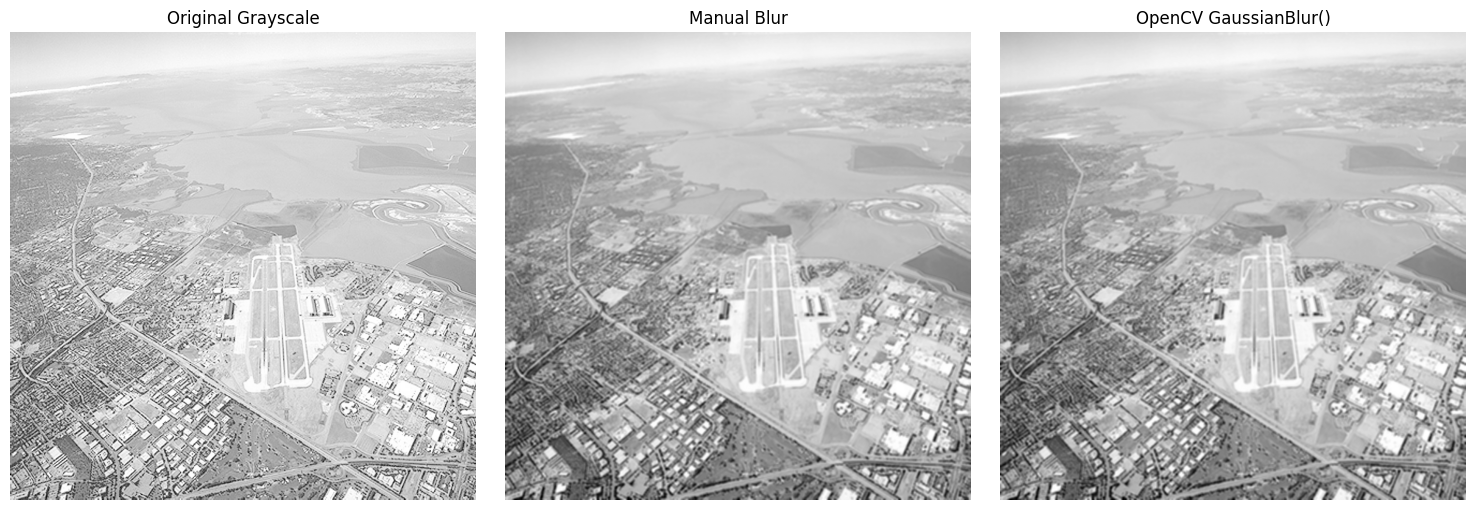

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(manual_blur, cmap='gray')
plt.title('Manual Blur')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(cv_blur, cmap='gray')
plt.title('OpenCV GaussianBlur()')
plt.axis('off')

plt.tight_layout()
plt.show()


* **Gaussian Kernel Visualization**:The 3D surface plot of the $51\times51$ kernel shows a smooth, bell-shaped "hill". The highest point is at the center, meaning the middle pixel has the most influence, and the weights gradually decrease as we move further away from the center.
* **Smoothing Effect**: Applying the $5\times5$ Gaussian kernel with $\sigma=2$ successfully blurred the runway image. This process reduced sharp details and "noise" in the urban areas around the runway, creating a much smoother appearance.
* **Comparison of Methods:**: The results from the Manual Implementation using cv.filter2D() and the OpenCV Built-in Function cv.GaussianBlur() appear identical. This confirms that the manual mathematical formula for the Gaussian distribution was implemented correctly.
* **Brightness Preservation:**: Because the computed $5\times5$ Gaussian kernel was normalized (the sum of all weights equals 1), the overall brightness of the blurred image remained the same as the original.

### Question 6

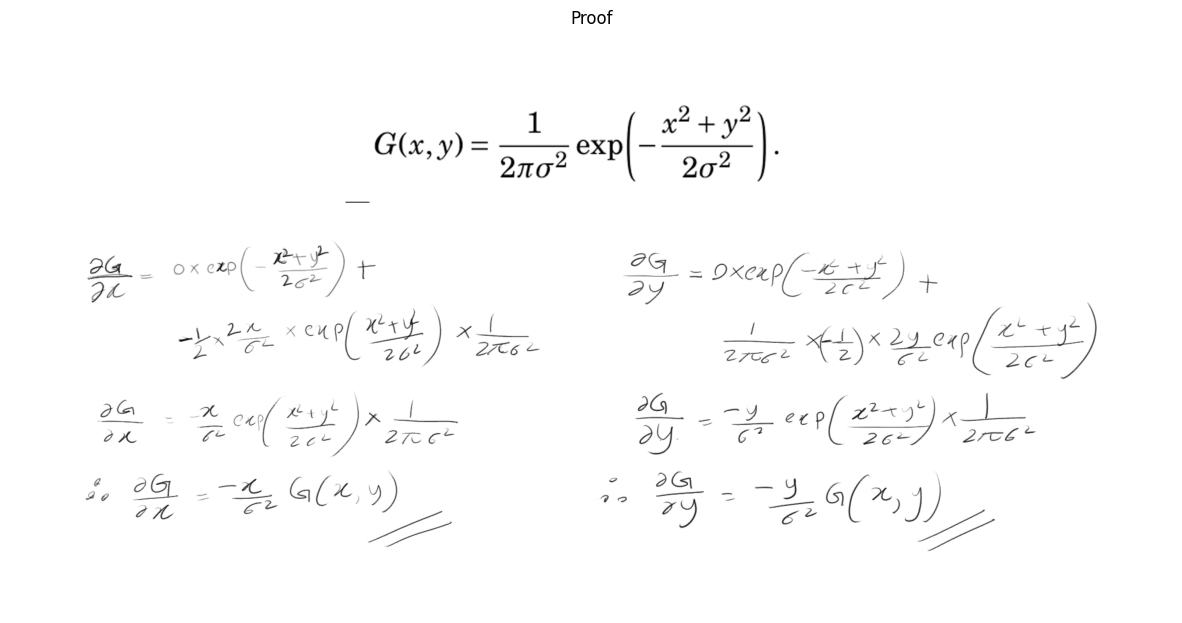

In [ ]:
#a)
proof = cv.imread('proof.png')
plt.figure(figsize=(15, 15))
plt.imshow(proof, cmap='gray')
plt.title('Proof')
plt.axis('off') # Hides the x and y pixel coordinates
plt.show()

In [ ]:


# (b) 5x5 Derivative Kernels 
def get_dog_kernels(size, sigma):
    k = (size - 1) / 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))
    g = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))
    

    diravative_gous_x = -(x / sigma**2) * g
    diravative_gous_y = -(y / sigma**2) * g
    return diravative_gous_x, diravative_gous_y

diravative_gous_x, diravative_gous_y = get_dog_kernels(5, 2)

# Print the kernels
print("Derivative of Gaussian Kernel (X-direction)")
print(diravative_gous_x)

print("\nDerivative of Gaussian Kernel (Y-direction)")
print(diravative_gous_y)

Derivative of Gaussian Kernel (X-direction)
[[ 0.00731873  0.00532434 -0.         -0.00532434 -0.00731873]
 [ 0.01064869  0.00774687 -0.         -0.00774687 -0.01064869]
 [ 0.01206654  0.00877836 -0.         -0.00877836 -0.01206654]
 [ 0.01064869  0.00774687 -0.         -0.00774687 -0.01064869]
 [ 0.00731873  0.00532434 -0.         -0.00532434 -0.00731873]]

Derivative of Gaussian Kernel (Y-direction)
[[ 0.00731873  0.01064869  0.01206654  0.01064869  0.00731873]
 [ 0.00532434  0.00774687  0.00877836  0.00774687  0.00532434]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.00532434 -0.00774687 -0.00877836 -0.00774687 -0.00532434]
 [-0.00731873 -0.01064869 -0.01206654 -0.01064869 -0.00731873]]


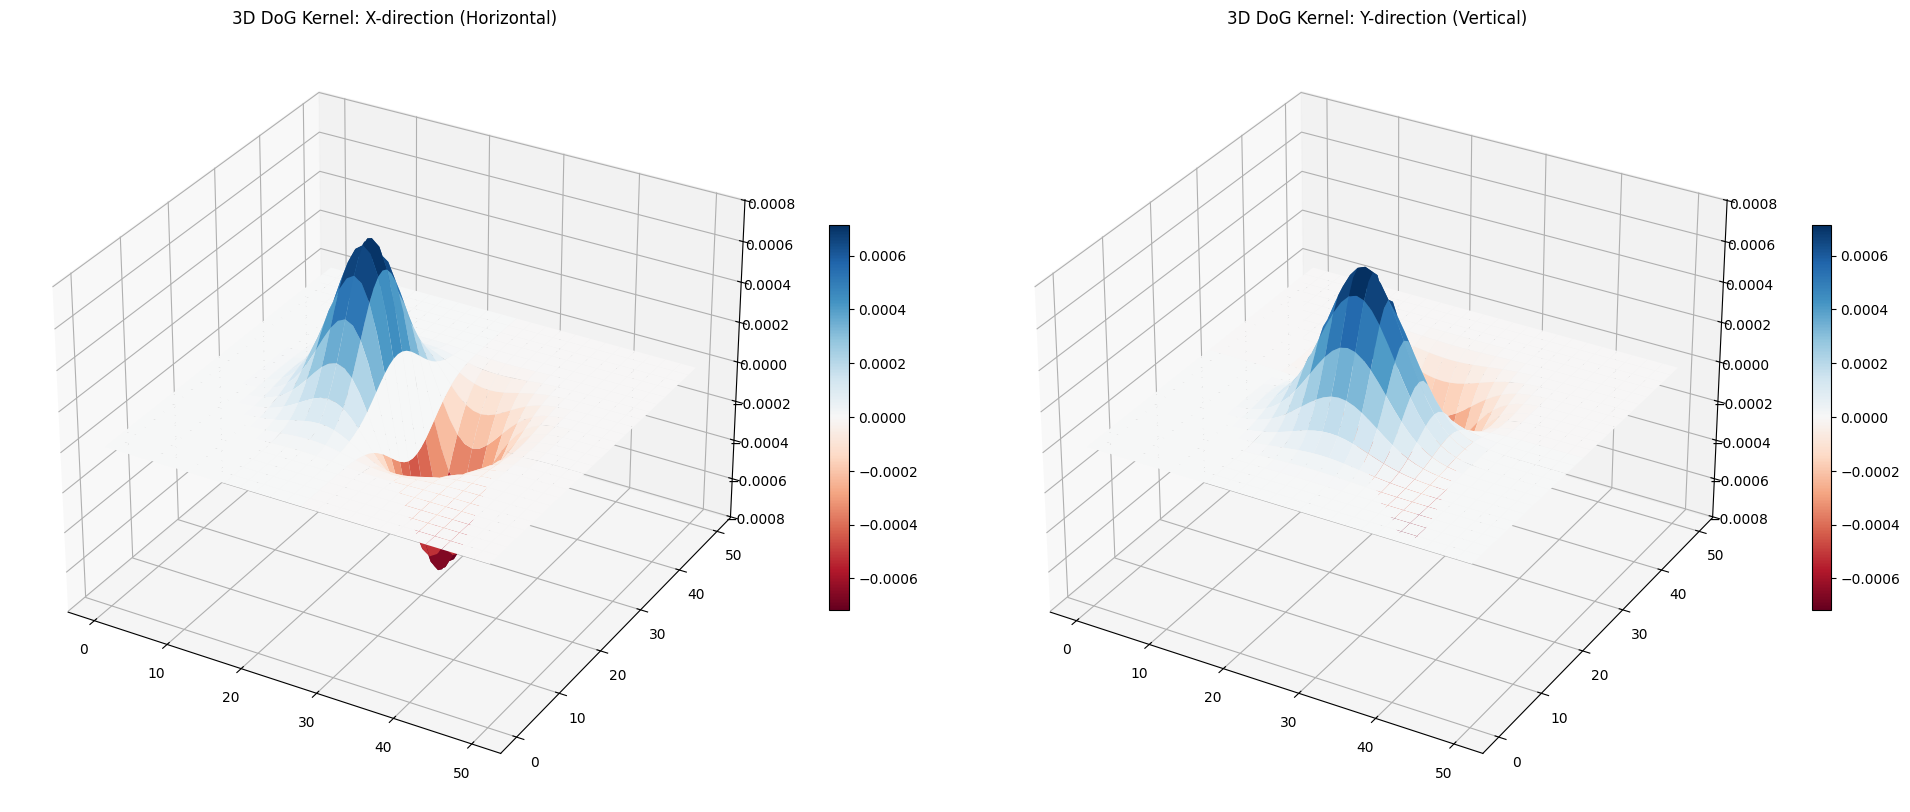

In [ ]:
#c)
kernel_x_51, kernel_y_51 = get_dog_kernels(51, 5)
x_grid, y_grid = np.meshgrid(np.arange(51), np.arange(51))
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(x_grid, y_grid, kernel_x_51, cmap='RdBu')
ax1.set_title('3D DoG Kernel: X-direction (Horizontal)')
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# --- Plot Y-Derivative (Vertical Gradient) ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(x_grid, y_grid, kernel_y_51, cmap='RdBu')
ax2.set_title('3D DoG Kernel: Y-direction (Vertical)')
fig.colorbar(surf2, ax=ax2, shrink=0.5)

plt.tight_layout()
plt.show()

In [39]:
img = cv.imread('runway.png')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

In [ ]:
#d
grad_x = cv.filter2D(gray, cv.CV_64F, diravative_gous_x)
grad_y = cv.filter2D(gray, cv.CV_64F, diravative_gous_y)

#e
sobel_x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=5)


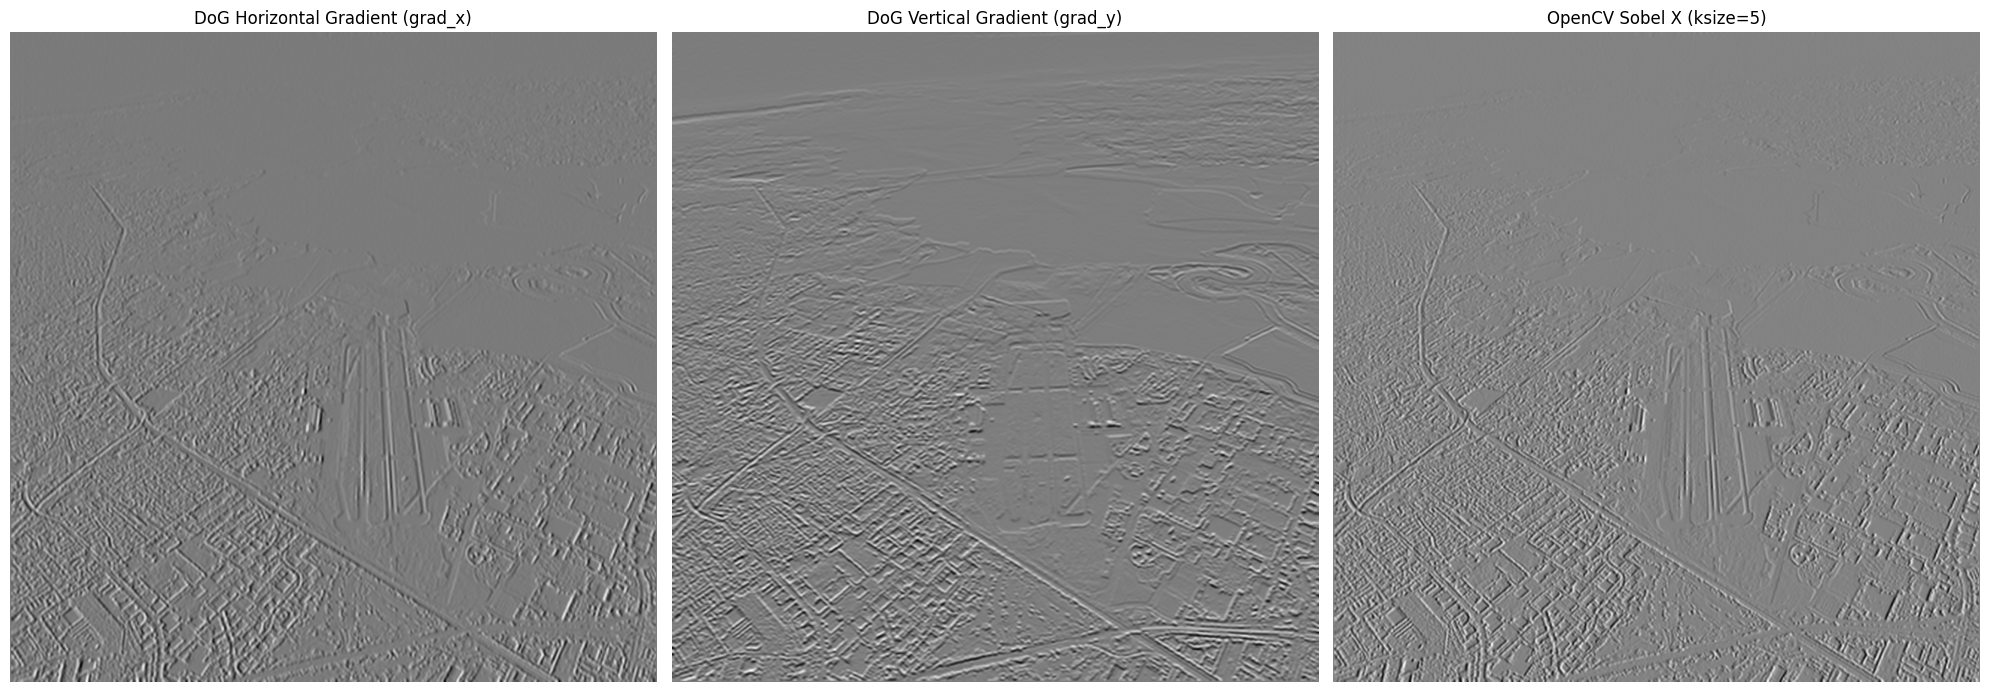

In [42]:
plt.figure(figsize=(20, 7))

# 1. Show Horizontal Gradient from your DoG Kernel (d)
plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.title('DoG Horizontal Gradient (grad_x)')
plt.axis('off')

# 2. Show Vertical Gradient from your DoG Kernel (d)
plt.subplot(1, 3, 2)
plt.imshow(grad_y, cmap='gray')
plt.title('DoG Vertical Gradient (grad_y)')
plt.axis('off')

# 3. Show OpenCV Sobel X result for comparison (e)
plt.subplot(1, 3, 3)
plt.imshow(sobel_x, cmap='gray')
plt.title('OpenCV Sobel X (ksize=5)')
plt.axis('off')

plt.tight_layout()
plt.show()


* **Gradient Directionality**: 
    * The **Horizontal Gradient (`grad_x`)** effectively highlights **vertical edges**, such as the sides of the runway and building walls, by measuring intensity changes along the X-axis.
    * The **Vertical Gradient (`grad_y`)** highlights **horizontal edges**, such as the horizon line and airfield markings, by measuring the rate of change along the Y-axis.
* **Manual vs. Sobel Comparison**: 
    * The output of the manual **Derivative of Gaussian (`grad_x`)** is visually consistent with the **OpenCV Sobel X** result. 
    * This similarity confirms that the mathematical derivation of $\frac{\partial G}{\partial x} = -\frac{x}{\sigma^2} G(x, y)$ was correctly implemented to identify image gradients.
* **Visual Characteristics**: 
    * The gradient images appear as a neutral gray; this "middle-gray" represents regions with a zero gradient (constant intensity).
    * Bright white and deep black lines indicate strong positive and negative changes in brightness, which clearly define object boundaries.

### Question 07

In [ ]:
# a)
def zoom_image(img, s, mode='nearest'):
    h, w = img.shape[:2]
    new_h, new_w = int(h * s), int(w * s)
    output = np.zeros((new_h, new_w, 3) if len(img.shape)==3 else (new_h, new_w), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            src_x, src_y = j / s, i / s
            if mode == 'nearest':
                x, y = min(int(round(src_x)), w - 1), min(int(round(src_y)), h - 1)
                output[i, j] = img[y, x]
            elif mode == 'bilinear':
                x1, y1 = int(src_x), int(src_y)
                x2, y2 = min(x1 + 1, w - 1), min(y1 + 1, h - 1)
                dx, dy = src_x - x1, src_y - y1
                pixel = (1-dx)*(1-dy)*img[y1, x1] + dx*(1-dy)*img[y1, x2] + \
                        (1-dx)*dy*img[y2, x1] + dx*dy*img[y2, x2]
                output[i, j] = pixel.astype(np.uint8)
    return output

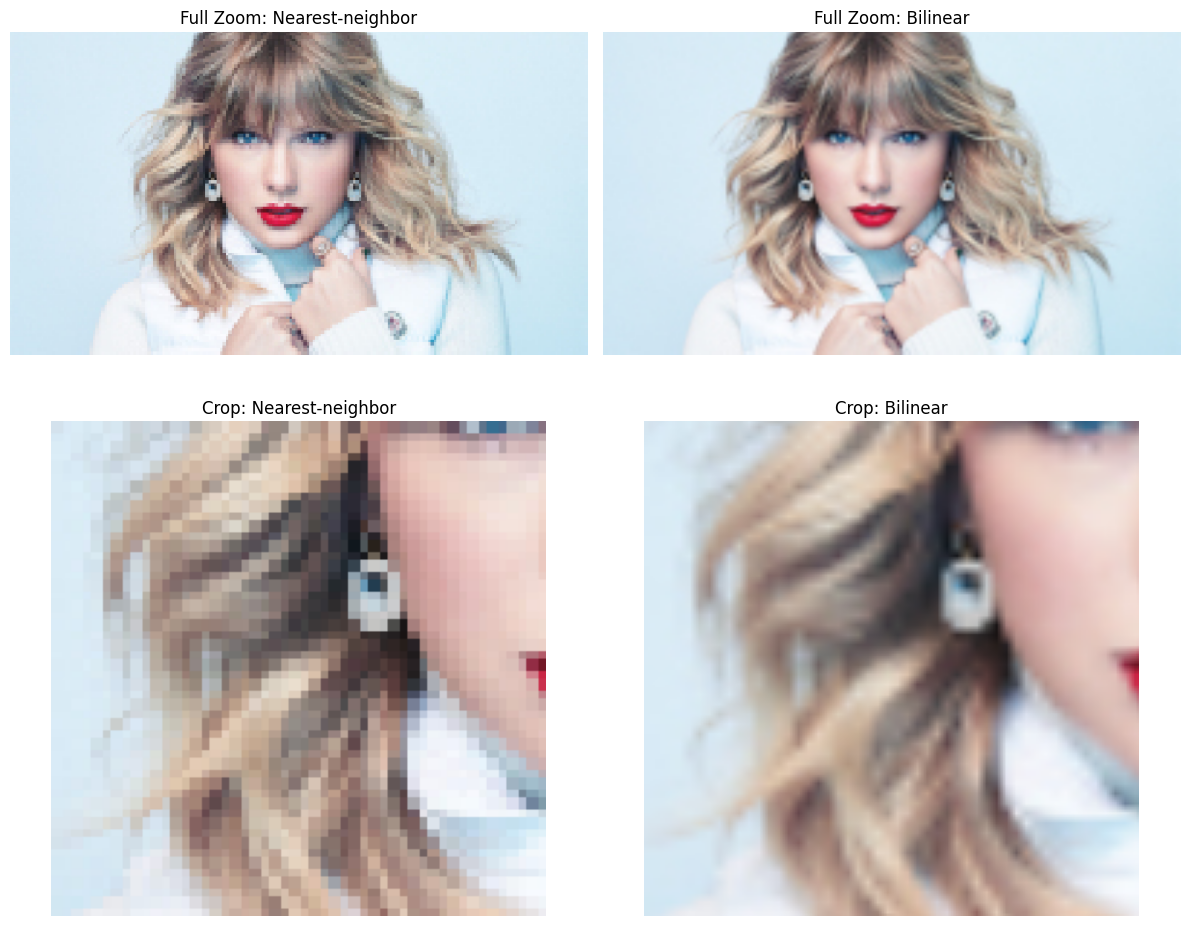

In [32]:
img = cv.imread('images_for_zooming/a1q5images/taylor_small.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Perform 4x Zoom
near_full = zoom_image(img_rgb, 4, mode='nearest')
bilin_full = zoom_image(img_rgb, 4, mode='bilinear')

# Visualization: Full Zoom and Detailed Crops
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(near_full)
axes[0, 0].set_title('Full Zoom: Nearest-neighbor')
axes[0, 0].axis('off')

axes[0, 1].imshow(bilin_full)
axes[0, 1].set_title('Full Zoom: Bilinear')
axes[0, 1].axis('off')

# Zoomed crops to show detail/artifacts
axes[1, 0].imshow(near_full[150:350, 150:350])
axes[1, 0].set_title('Crop: Nearest-neighbor')
axes[1, 0].axis('off')

axes[1, 1].imshow(bilin_full[150:350, 150:350])
axes[1, 1].set_title('Crop: Bilinear')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#b)
original = cv.imread('images_for_zooming/a1q5images/im01.png', 0)
small = cv.imread('images_for_zooming/a1q5images/im01small.png', 0)
s_factor = original.shape[0] / small.shape[0]

res_near = zoom_image(small, s_factor, mode='nearest')
res_bilin = zoom_image(small, s_factor, mode='bilinear')

ssd_near = np.mean((original.astype(np.float64) - res_near.astype(np.float64))**2)
ssd_bilin = np.mean((original.astype(np.float64) - res_bilin.astype(np.float64))**2)

print(f"Normalized SSD (Nearest): {ssd_near:.2f}")
print(f"Normalized SSD (Bilinear): {ssd_bilin:.2f}")

Normalized SSD (Nearest): 256.82
Normalized SSD (Bilinear): 201.45


### Question 08

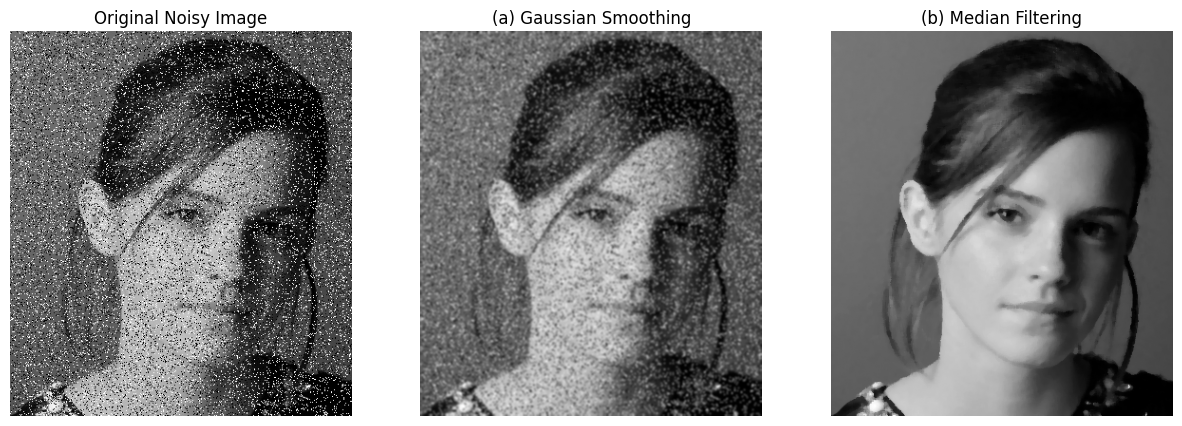

In [ ]:

img = cv.imread('emma_salt_pepper.jpg', 0) 

gaussian_blur = cv.GaussianBlur(img, (5, 5), 0)
median_blur = cv.medianBlur(img, 5)

# --- Display Results ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('(a) Gaussian Smoothing')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_blur, cmap='gray')
plt.title('(b) Median Filtering')
plt.axis('off')

plt.show()


* **Original Noisy Image**: The source image is heavily corrupted with **salt and pepper noise**. This type of noise appears as sharp, isolated black and white pixels scattered across the image, obscuring fine details.
* **(a) Gaussian Smoothing**: 
    * The Gaussian filter proves ineffective for this type of noise. 
    * Since it calculates a weighted average of the neighborhood, it simply "smears" the extreme noise values, resulting in a blurry image where the noise persists as gray patches.
* **(b) Median Filtering**: 
    * The median filter provides a vastly superior result, effectively removing the noise while preserving edges. 
    * By selecting the median value of the pixel neighborhood, the filter ignores the "outlier" salt and pepper pixels, resulting in a clean and sharp reconstruction of the subject.
* **Conclusion**: For impulsive noise such as salt and pepper, **Median Filtering** is the standard and most effective solution, as linear filters like Gaussian blur fail to eliminate extreme pixel outliers.

### Question 09

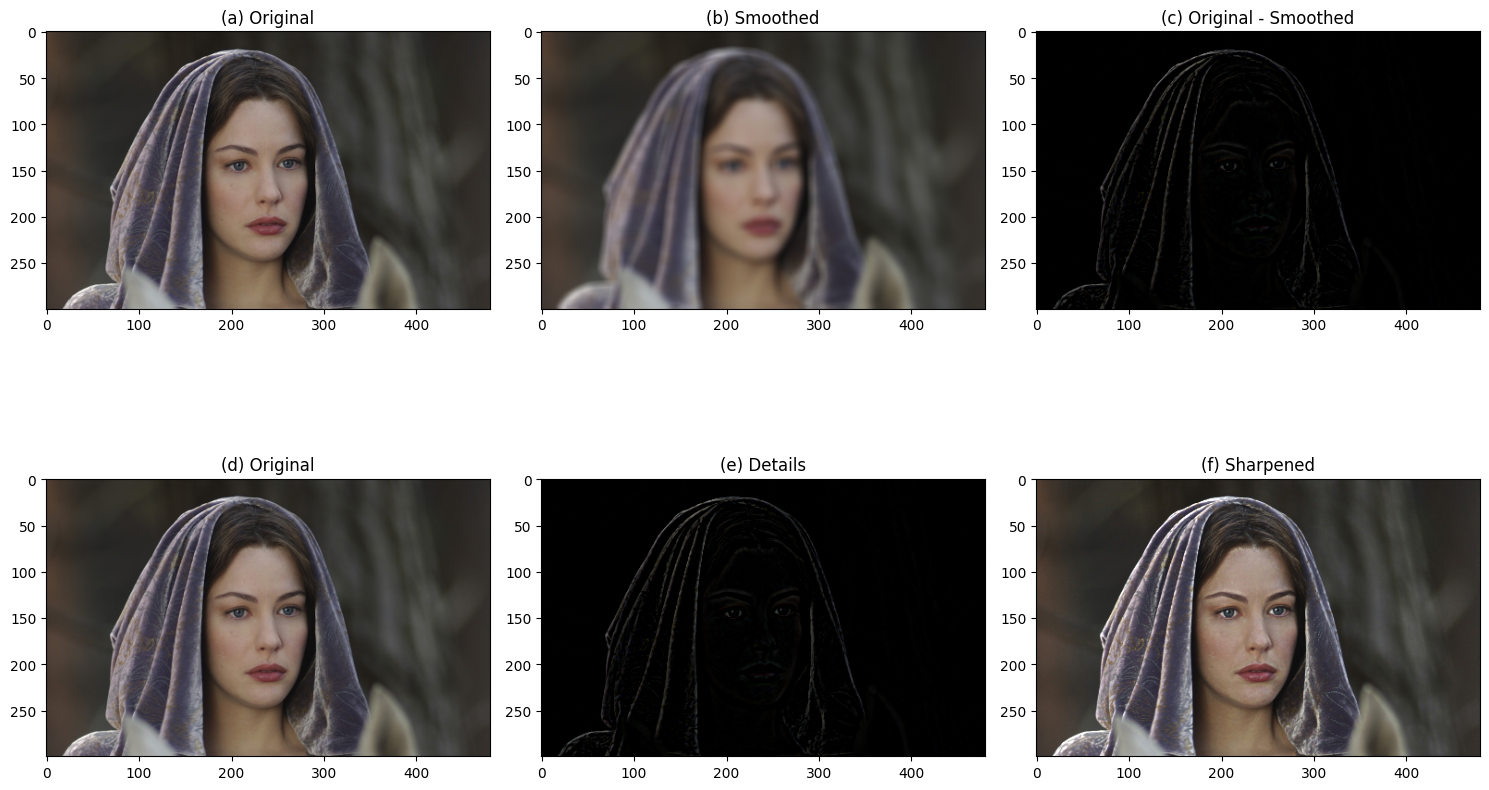

In [ ]:

img = cv.imread('images_for_zooming/a1q5images/im02small.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


smoothed = cv.GaussianBlur(img_rgb, (9, 9), 10)
details = cv.subtract(img_rgb, smoothed)
sharpened = cv.add(img_rgb, details)


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1); plt.imshow(img_rgb); plt.title('(a) Original')
plt.subplot(2, 3, 2); plt.imshow(smoothed); plt.title('(b) Smoothed')
plt.subplot(2, 3, 3); plt.imshow(details); plt.title('(c) Original - Smoothed')

plt.subplot(2, 3, 4); plt.imshow(img_rgb); plt.title('(d) Original')
plt.subplot(2, 3, 5); plt.imshow(details); plt.title('(e) Details')
plt.subplot(2, 3, 6); plt.imshow(sharpened); plt.title('(f) Sharpened')

plt.tight_layout()
plt.show()


* **Step 1: Image Smoothing**: 
    * The original image is first processed with a **Gaussian Blur** to create a smoothed version. 
    * This step effectively removes high-frequency components (fine details and sharp edges), leaving only the low-frequency "base" of the image.
* **Step 2: Detail Extraction (High-Pass)**: 
    * By subtracting the smoothed image from the original ($Original - Smoothed$), we isolate the **Detail Map**. 
    * This intermediate result contains only the sharp edges and fine textures of the image, appearing mostly black where intensities were constant and bright where edges were present.
* **Step 3: Edge Enhancement**: 
    * The final sharpened image is produced by adding the extracted Detail Map back onto the original image ($Original + Details$).
* **Conclusion**: 
    * This manual sharpening technique enhances the local contrast at edge boundaries. 
    * As seen in the final result, features like the eyes, hair strands, and fabric textures appear much more defined and "crisp" compared to the original, without the use of automated sharpening filters.

### Question 10

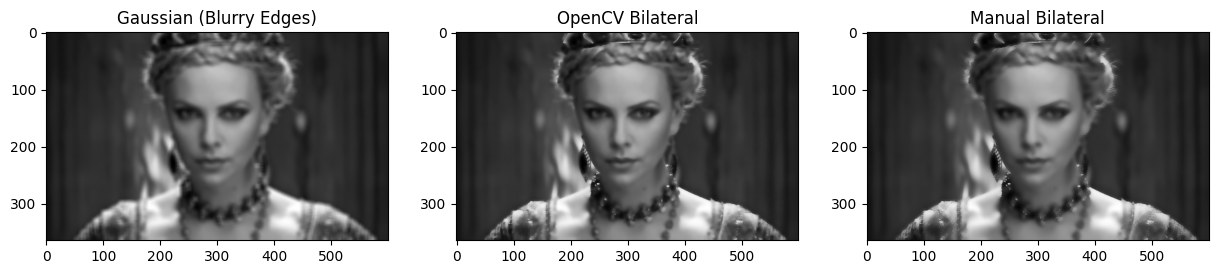

In [ ]:
#a)

def manual_bilateral_filter(image, diameter, sigma_s, sigma_r):
    h, w = image.shape
    output = np.zeros((h, w), dtype=np.float64)
    radius = diameter // 2
    
    x, y = np.meshgrid(np.arange(-radius, radius + 1), np.arange(-radius, radius + 1))
    spatial_gaussian = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))
    

    padded_img = cv.copyMakeBorder(image, radius, radius, radius, radius, cv2.BORDER_REFLECT)

    for r in range(h):
        for c in range(w):
            
            window = padded_img[r : r + diameter, c : c + diameter].astype(np.float64)
            center_pixel = padded_img[r + radius, c + radius].astype(np.float64)
            
            intensity_diff = window - center_pixel
            range_gaussian = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))
        
            combined_weights = spatial_gaussian * range_gaussian
            normalization_factor = np.sum(combined_weights)
        
            output[r, c] = np.sum(window * combined_weights) / normalization_factor
            
    return output.astype(np.uint8)


img = cv.imread('images_for_zooming/a1q5images/im03small.png', 0) # Grayscale as per instructions

# (b) OpenCV Gaussian Smoothing
gauss = cv.GaussianBlur(img, (9, 9), 5)

# (c) OpenCV Bilateral Filter
cv2_bilateral = cv.bilateralFilter(img, 9, 75, 75)

# (d) Manual Bilateral Filter
manual_bilateral = manual_bilateral_filter(img, 9, 75, 75)

# --- Visualization ---
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(gauss, cmap='gray'); plt.title('Gaussian (Blurry Edges)')
plt.subplot(1, 3, 2); plt.imshow(cv2_bilateral, cmap='gray'); plt.title('OpenCV Bilateral')
plt.subplot(1, 3, 3); plt.imshow(manual_bilateral, cmap='gray'); plt.title('Manual Bilateral')
plt.show()


* **Mechanism**: 
    * Unlike Gaussian smoothing which only uses a spatial kernel, the **Bilateral Filter** uses two kernels.
    * The **Spatial Kernel** ($\sigma_s$) ensures pixels farther away have less influence.
    * The **Range Kernel** ($\sigma_r$) ensures pixels with significantly different intensities (like those across an edge) have less influence.
* **Observation (b) vs (c)**: 
    * **Gaussian Blur** creates a uniform haze, causing edges (like the eyes and jawline) to become fuzzy.
    * **Bilateral Filter** smooths the skin texture effectively while keeping the sharp details of the edges intact.
* **Observation (d)**: 
    * The manual implementation produces a result nearly identical to OpenCV’s `cv2.bilateralFilter`. 
    * This confirms that by multiplying the intensity difference weight by the spatial distance weight, we successfully create an "edge-aware" smoothing effect.